Laboratory 3: Logistic Regression

Binary logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head(10)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


Ex. 1.: Please follow the steps below:

- divide the data into parameters (X) and labels/classes (y)
- create theta vector
- add a row with values '1' on the top of the X matrix
- normalize features of X matrix

In [2]:
X=data.values[:,:2].T
y=data.values[:,2:].T
theta = np.zeros((X.shape[0]+1,1))
X = np.concatenate([np.ones([1, X.shape[1]]), X])
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

Ex. 2.: Please plot the loaded data in the graph (using scatter plot). Can be both: a 2D plot with marks colored regarding to the class or a 3D plot with the class showed as 3rd dimension.

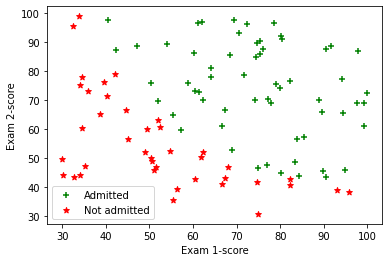

In [3]:
#data to plot
admitted_1=data[data['Admitted']==1]['Exam 1']
admitted_2=data[data['Admitted']==1]['Exam 2']
nadmitted_1=data[data['Admitted']==0]['Exam 1']
nadmitted_2=data[data['Admitted']==0]['Exam 2']
#scatter plot
plt.scatter(admitted_1,admitted_2,label='Admitted',c='green',marker="+")
plt.scatter(nadmitted_1,nadmitted_2,label='Not admitted',c='red',marker='*')
plt.xlabel('Exam 1-score')
plt.ylabel('Exam 2-score')
plt.legend()
plt.show()

Ex. 3.: Implement a logistic function (sigmoid):

In [4]:
def sig(t):
    return 1.0/(1.0+np.exp(-t))

Ex. 4.: Using the function np.arange or np.linspace, please generate data from the range [-5.5], step 0.5 and check the correct operation of the implemented function by plotting it.

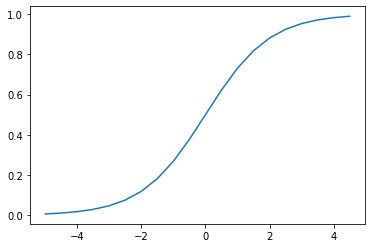

In [5]:
t=np.arange(-5,5,0.5)
plt.plot(t,sig(t))
plt.show()

Ex. 5. Based on the above formulas, please implement the cost function J (recommended vectorized solution):

In [6]:
def h(X,theta):
    return sig(theta.T@X)

def cost(theta, X, y):
    return np.sum(-y*np.log(h(X,theta))-((1-y)*np.log(1 - h(X,theta))))/y.shape[1]


In [7]:
theta=np.zeros((X.shape[0],1))
print(cost(theta=theta,X=X,y=y))

0.6931471805599453


Ex. 6.: Please implement simple gradient function:

In [8]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    for i in range(it):
        g = np.sum((-y/(sig(theta.T@X)) + (1-y)/(1-sig(theta.T@X)))*sig(theta.T@X)*(1-sig(theta.T@X))*X,axis=1)
        g.shape = [g.shape[0],1]
        theta = theta - alpha*g/X[0].shape
    
    return theta

theta = simple_gradient(X,y,theta,1,150)
print(f'theta: {theta}, \n cost: {cost(theta,X,y)}')

theta: [[1.41957362]
 [3.35941597]
 [3.11271333]], 
 cost: 0.20640714304449775


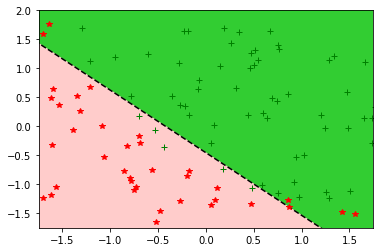

In [9]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2,'k--')
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'g+')
plt.plot(X1_0, X2_0, 'r*')
plt.xlim([-1.75,1.75])
plt.ylim([-1.75,2])
plt.fill_between(x1,x2,np.max(np.abs(x2)),color='#32cd32')
plt.fill_between(x1,x2,np.min(x2),color='#ffcccb')
plt.show()

LOGISTIC REGRESSION

Multi-class logistic regression

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

logreg=LogisticRegression(penalty='l1',solver='saga',random_state=16)
logreg.fit(X,Y)



LogisticRegression(penalty='l1', random_state=16, solver='saga')

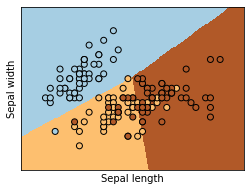

In [11]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

Ex. 3.: Using method predict_proba please predict the probability of being a member of a given class.

In [12]:
y_pred=logreg.predict_proba(X)
for i in range(len(iris.target_names)):
    print(f'probability for {i} name : {(np.sum(y_pred,axis=0)/len(Y))[i]}')

probability for 0 name : 0.3302490208676197
probability for 1 name : 0.33027301574398055
probability for 2 name : 0.33947796338839936


Ex. 4.: Evaluation - please assess the accuracy of the algorithms using a variety of metrics (at least 2).

In [13]:
import sklearn.metrics as smet
#accurancy score
print('accurancy_score:',smet.accuracy_score(Y,(logreg.predict(X))))

#f1 
print('f1:',smet.f1_score(Y,(logreg.predict(X)),average='macro'))

#r2
print('r2:',smet.r2_score(Y,(logreg.predict(X))))


accurancy_score: 0.8133333333333334
f1: 0.8127777777777778
r2: 0.72
